In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('musk_csv.csv')
dataset.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [3]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

/Users/skhiearth/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
# Importing Keras and TensorFlow
import tensorflow as tf

# Initialising the ANN
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=(166,), 
                          kernel_initializer = 'uniform', 
                          activation=tf.nn.tanh),
    tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])

# Compiling the ANN
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
history = model.fit(X, y, validation_split = 0.2, epochs = 10)

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 1s 219us/sample - loss: 0.3740 - accuracy: 0.8232 - val_loss: 0.0705 - val_accuracy: 0.9886
Epoch 2/10
5278/5278 [==============================] - 0s 64us/sample - loss: 0.1952 - accuracy: 0.9229 - val_loss: 0.0495 - val_accuracy: 0.9864
Epoch 3/10
5278/5278 [==============================] - 0s 66us/sample - loss: 0.1582 - accuracy: 0.9377 - val_loss: 0.0424 - val_accuracy: 0.9864
Epoch 4/10
5278/5278 [==============================] - 0s 78us/sample - loss: 0.1345 - accuracy: 0.9466 - val_loss: 0.0384 - val_accuracy: 0.9871
Epoch 5/10
5278/5278 [==============================] - 0s 64us/sample - loss: 0.1102 - accuracy: 0.9564 - val_loss: 0.0368 - val_accuracy: 0.9856
Epoch 6/10
5278/5278 [==============================] - 0s 65us/sample - loss: 0.0949 - accuracy: 0.9663 - val_loss: 0.0372 - val_accuracy: 0.9841
Epoch 7/10
5278/5278 [==============================] - 0s 67us/sampl

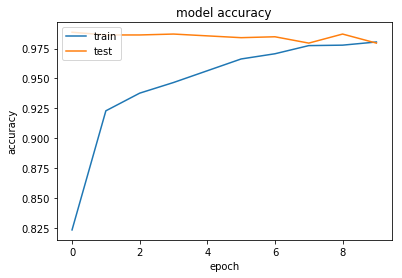

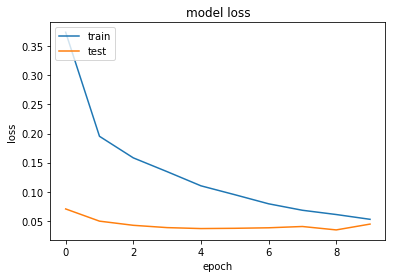

In [6]:
import matplotlib.pyplot as plt
# Model Accuracy Visualisation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Loss Visualisation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()